# Low Pass Filter

<img src="lowpass.jpg">

### Applying Kirchoff's current law on node 2 gives:

## i<sub>12</sub> + i<sub>02</sub> + i<sub>32</sub> = 0

### Kirchoff's voltage law on loop I<sub>1</sub>,

## i<sub>12</sub> = (v<sub>S</sub>(t) - v<sub>C</sub>(t)) / R<sub>1</sub>

## i<sub>02</sub> = - v<sub>C</sub>'(t) * C

## i<sub>32</sub> = - v<sub>C</sub>(t) / R<sub>2</sub>

### Substituting everything gives the differential equation for v<sub>C</sub>(t), 

## v<sub>C</sub>'(t) = v<sub>S</sub>(t) / (R<sub>1</sub> * C) - v<sub>C</sub>(t) * (1/R<sub>1</sub> + 1/R<sub>2</sub>) / C

## Using Numerical Method

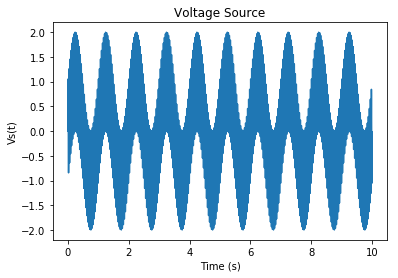

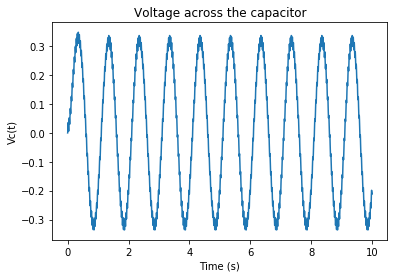

In [2]:
import numpy as np
import matplotlib.pyplot as plt

R1 = 3.0
R2 = 2.0
C = 1

t = np.arange(0,10,0.0001)
Vs = np.sin(2 * np.pi * 1 * t) + np.sin(2 * np.pi * 30 * t)

delta = 0.001

Vc = np.zeros(len(t))
I = np.zeros(len(t))

for i in range(1,len(Vc)):
    Vc[i] = Vc[i-1] + delta * (Vs[i-1]/(R1*C) - (Vc[i-1]/C) * (1/R1 + 1/R2))

plt.plot(t,Vs)
plt.xlabel('Time (s)')
plt.ylabel('Vs(t)')
plt.title('Voltage Source')
plt.show()

plt.plot(t,Vc)
plt.xlabel('Time (s)')
plt.ylabel('Vc(t)')
plt.title('Voltage across the capacitor')
plt.show()

## Using FFT


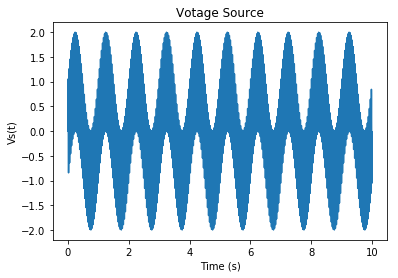

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


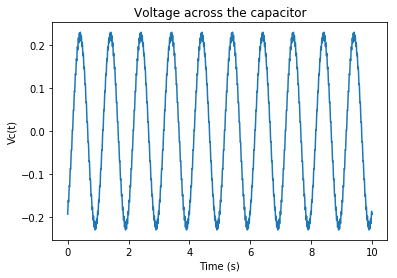

In [3]:
from numpy.fft import fft
from numpy.fft import ifft

R = 10.0
L = 0.2
C = 0.2
T = 10
t = np.arange(0,T,0.0001)

Vs = np.sin(2 * np.pi * 1 * t) + np.sin(2 * np.pi * 30 * t)

N = len(t)
w = np.ones(N)
w[0:N/2 +1]= 2 * np.pi/T * np.array([np.arange(0,N/2 +1)])
w[N/2+1 : N] = 2 * np.pi/T * np.arange(-(N/2 -1),0)

Vc = ifft(fft(Vs)/(R1 * (1j * w * C + 1/R1 + 1/R2)))

plt.plot(t,Vs)
plt.xlabel('Time (s)')
plt.ylabel('Vs(t)')
plt.title('Votage Source')
plt.show()


plt.plot(t,(Vc))
plt.xlabel('Time (s)')
plt.ylabel('Vc(t)')
plt.title('Voltage across the capacitor')
plt.show()